In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [5]:
data = pd.read_csv('Salaries.csv')
data.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [6]:
data.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


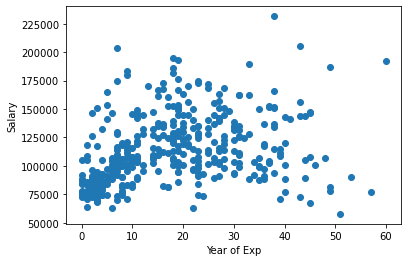

[108543.18787587 108543.18787587 119354.14209704 103498.07590599
 105660.26675022 110705.3787201  103498.07590599 108543.18787587
 103498.07590599 113588.29984575 115750.49068998 109263.91815728
 120795.60265986 104939.53646881 109984.64843869 117191.95125281
 116471.2209714  109984.64843869 115750.49068998 108543.18787587
 122237.06322269 102777.34562458 105660.26675022 104939.53646881
 109263.91815728 107101.72731305 110705.3787201  124399.25406692
 115029.76040857 120795.60265986 124399.25406692 113588.29984575
 102777.34562458 110705.3787201  107822.45759446 106380.99703164
 120795.60265986 128002.90547398 114309.03012716 106380.99703164
 119354.14209704 114309.03012716 128723.63575539 119354.14209704
 112867.56956434 118633.41181563 130165.09631821 113588.29984575
 129444.3660368  110705.3787201  107101.72731305 109984.64843869
 117191.95125281 104939.53646881 108543.18787587 119354.14209704
 113588.29984575 116471.2209714  140976.05053938 132327.28716245
 118633.41181563 104939.5

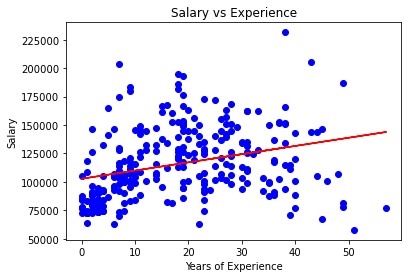

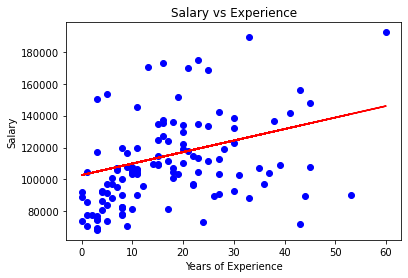

(28505.014985203205, -0.11568392395415072)

In [7]:
data = pd.read_csv('Salaries.csv')
data
data.isnull().sum()
data.info()
data.describe()
plt.scatter( data['yrs.service'] ,data['salary'] )
plt.xlabel('Year of Exp')
plt.ylabel('Salary')
plt.show()
X=data.iloc[:,3:4].values
Y=data.iloc[:,-1].values

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=0.30)

lr = LinearRegression()
lr.fit(X_train , Y_train)

pred = lr.predict(X_test)
print(pred)
Y_test
lr.score(X_test , Y_test)
diff = Y_test - pred
print(diff)
pred1=pd.DataFrame(np.c_[Y_test , pred , diff] , columns=['Actual','Predicted','Difference'])
pred1
plt.scatter(X_train , Y_train , color='blue')
plt.plot(X_train,lr.predict(X_train),color='red')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel("Salary")
plt.show()
plt.scatter(X_test , Y_test,color='blue')
plt.plot(X_test ,lr.predict(X_test) ,color='red')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel("Salary")
plt.show()
rmse = np.sqrt(mean_squared_error(Y_test,pred))
r2 = r2_score(Y_test,pred)
rmse , r2

dtr = DecisionTreeRegressor()
dtr.fit(X_train , Y_train)
pred1 = dtr.predict(X_test)
pred1
Y_test
rmse1 = np.sqrt(mean_squared_error(Y_test,pred1))
r21 = r2_score(Y_test,pred1)


rmse1,r21